# Описание проекта

**Данные** Нам предоставлены данные интернет-магазина "Стримчик" о продаже игр до 2016года.

**Цель:** выявить закономерности, пределяющие успешность игры, с целью прогноза потенциально популярного продукта и планирования рекламной компании

**План работы**
1. Загрузка данных
2. Предобработка
3. Исследовательский анализ всей базы
    - выбор актуального периода
    - выбор наиболее популярных платформ
    - анализ динамики продаж
4. Составление портрета пользователя по регионам
5. Проверка гепотиз
6. Общий вывод
   

## Знакомство с данными

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Загружаем и изучаем файл:

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
display(games.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перименовываем столбцы:

In [6]:
print(games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
games.columns = games.columns.str.lower()

Изучаем пропуски:

In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
def pass_value(df):
    (
        (df.isna().mean()*100)
        
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 10)
        .set_title('Кол-во пропусков в датасете games')
    );

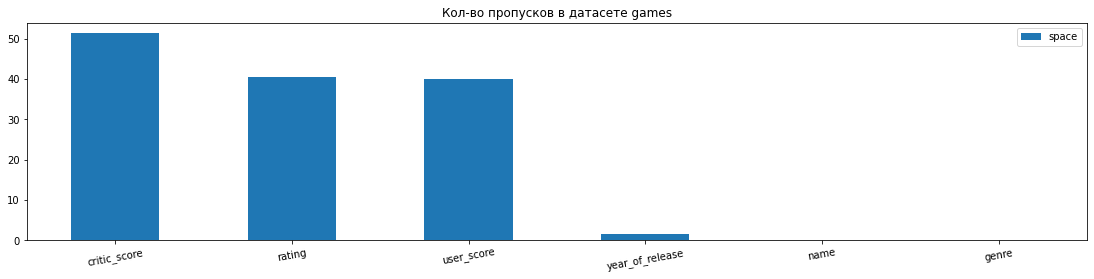

In [10]:
pass_value(games)

In [11]:
print('Количество игр:', games['name'].value_counts().count())
print('Количество игровых платформ:', games['platform'].value_counts().count())
print('Количество жанров:', games['genre'].value_counts().count())
print('Количество лет:', games['year_of_release'].value_counts().count())
print('Количество явных дубликатов', games.duplicated().sum())
print('Количество строк', games.shape[0])
print('Количество столбцов', games.shape[1])

Количество игр: 11559
Количество игровых платформ: 31
Количество жанров: 12
Количество лет: 37
Количество явных дубликатов 0
Количество строк 16715
Количество столбцов 11


**Вывод**

Мы привели наименования столбцов к стандартному виду. В датасете имеются пропуски в столбцах `name`, `year_of_release`, `user_score`,`critic_score`, `rating`. Необходимо проверить возможность восстановления данных по году выпуска, изменить тип данных в столбце `year_of_release`, расчитать суммарный объем продаж.

*Столбцы 'critic_score' и 'user_score'
Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. То же самое справедливо и для столбца 'user_score'. Ведь оценки играм пользователям нужно было где-то размещать в сети. Также, так как данные не за полный 2016 год, то и там логично наблюдать пустые значения.* **[Система оценок](https://gamesisart.ru/theory_game_score_2.html)

*Столбец 'raiting'
Крупнейшая негосударственная организация ([ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг.*

## Предобработка данных

In [12]:
print('В столбце `name` содержится пропусков:', games['name'].isna().sum())

В столбце `name` содержится пропусков: 2


In [13]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце `name` отсутствуют сведения о наименовании двух игр. В этих же строках отсутствуют данные о жанре игры, оценках критиков и пользователей, рейтинг ESRB.

Возможности восстановить эти данные не представляется возможным. Удаляем:

In [14]:
games = games.dropna(subset=['name'], axis=0)

In [15]:
print('В столбце `year_of_release` содержится пропусков:', games['year_of_release'].isna().sum())

В столбце `year_of_release` содержится пропусков: 269


Посмотрим названия игр, в которых не указан год выпуска.

In [16]:
print(sorted(games[games['year_of_release'].isna() == True]['name'].unique()))

['AKB1/48: Idol to Guam de Koishitara...', 'Action Man-Operation Extreme', 'Advance Wars: Days of Ruin', 'Adventure', 'Agarest Senki: Re-appearance', 'Air-Sea Battle', 'Alex Rider: Stormbreaker', 'All-Star Baseball 2005', 'Alone in the Dark: The New Nightmare', 'Aquaman: Battle for Atlantis', 'Atsumare! Power Pro Kun no DS Koushien', 'B.L.U.E.: Legend of Water', 'Backbreaker', 'Battle vs. Chess', 'Bejeweled 3', 'Beyond the Labyrinth', 'Big Beach Sports 2', 'Bikkuriman Daijiten', 'BioShock 2', 'Breakaway IV', 'Brothers in Arms: Furious 4', 'Build-A-Bear Workshop: Friendship Valley', "Cabela's Alaskan Adventure", 'Call of Duty 3', 'Call of Duty: Black Ops', 'Captain America: Super Soldier', 'Charm Girls Club: My Fashion Mall', 'Charm Girls Club: My Fashion Show', 'Chou Soujuu Mecha MG', 'Circus Atari', 'Clockwork Empires', 'College Hoops 2K6', 'Combat', 'Combat Elite: WWII Paratroopers', 'Combat Wings: The Great Battles of WWII', "Cubix Robots for Everyone: Clash 'n' Bash", 'Custom Robo'

In [17]:
games[games['name'].isin(['GRID'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1868,GRID,PS3,"2,008.00",Racing,0.31,0.56,0.03,0.20,87.00,8.1,E
2396,GRID,X360,"2,008.00",Racing,0.33,0.44,0.01,0.09,87.00,7.9,E
13142,GRID,DS,NaN,Racing,0.04,0.00,0.00,0.00,79.00,8.1,E
13781,GRID,PC,NaN,Racing,0.00,0.03,0.00,0.01,87.00,7.9,E


In [18]:
games[games['name'].isin(['Tom and Jerry in War of the Whiskers'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6477,Tom and Jerry in War of the Whiskers,PS2,"2,002.00",Fighting,0.13,0.10,0.00,0.03,NaN,NaN,NaN
12100,Tom and Jerry in War of the Whiskers,GC,"2,003.00",Fighting,0.05,0.01,0.00,0.00,NaN,NaN,NaN
14749,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN


Как видно из представленных выборок, в датафрейме есть сведения о играх для разных платформ в разных строках. Мы можем восстановить часть пропущенных сведений, использовав эти данные:

In [19]:
for i in games[games['year_of_release'].isna() == True].index:
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

/tmp/ipykernel_36/2785474404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()


In [20]:
games['year_of_release'].isna().sum()

146

**Аббревиатура TBD** эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. - Читайте подробнее на FB.ru: https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie. 

Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.*

In [21]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


In [22]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

Изменим тип данных в столбцах:
- year_of_release в Int64
- user_score и critic_score в float64

In [23]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')
games['critic_score'] = games['critic_score'].astype('float64')
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5959,Nicktoons: Battle for Volcano Island,DS,2006,Action,0.27,0.00,0.00,0.02,59.00,NaN,E
3628,Shin Super Robot Taisen,PS,1996,Role-Playing,0.00,0.00,0.52,0.04,NaN,NaN,NaN
5142,Xenosaga Episode III: Also sprach Zarathustra,PS2,2006,Role-Playing,0.09,0.07,0.18,0.02,81.00,9.00,T
3065,Rayman Legends,WiiU,2013,Platform,0.25,0.33,0.03,0.05,92.00,8.70,E10+
9276,Shinobido 2: Tales of the Ninja,PSV,2011,Action,0.04,0.05,0.02,0.02,NaN,NaN,NaN


Считаем суммарный объем продаж:

In [24]:
games['over_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

**Вывод**

Мы удалили две строки, где были пропущены данные о наименовании и жанре игры, восстановили часть сведений о годе выпуска, сделали дополнительные расчеты об общем количестве продаж по каждой игре, изменили типы данных. Данные готовы к анализу.

## Исследовательский анализ

### Анализ всей базы данных:

Посчитаем количество игр по каждому году:

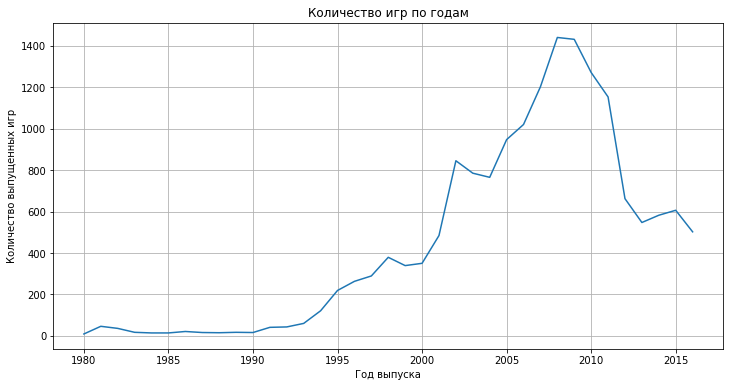

In [25]:
data_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
x = data_year['year_of_release']
y = data_year['name']
plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.grid()
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр");



Из полученных данных можно сделать следующие выводы:
- в период с 1993 по 2009 год отмечается резкое увеличесние количества выпущенных компьютерных игр. Это можно объяснить развитием персональных компьютеров, внедрением операционных систем  Microsoft Windows и Mac OS, а так же появлением приставок такие как Nintendo, Playstation, позже XBOX. В этот же период широко внедрялись CD-ROM, увеличилось число домашних персональных компьютеров. Рост мощности и доступности аппаратного обеспечения, так же сказался на популярности компьютерных игр.
- в период с 2009 по 2015 гг. можно отметить спад. В этот период многие разработчики начали выпускать более серьезные объемные и кроссплатформенные проекты, поэтому качество времени на разработку одной игры существенно увеличилось. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

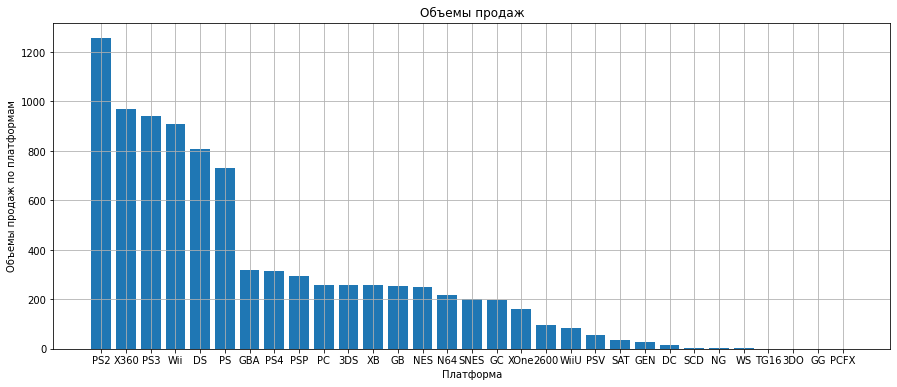

In [26]:
data_platform = (games.pivot_table(index='platform', values='over_sales', aggfunc='sum')
                 .sort_values(by='over_sales', ascending=False))
x = data_platform.index
y = data_platform['over_sales']
plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.grid()
plt.title("Объемы продаж")
plt.xlabel("Платформа")
plt.ylabel("Объемы продаж по платформам");

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS. Объемы продаж более 600 млн. копий

In [27]:
data_platform_year = (games.query('platform in ["PS2", "X360", "PS3", "WII", "DS", "PS", "PC"]')
                      .pivot_table(index='year_of_release', columns='platform', values='over_sales', aggfunc='sum'))            

Добавим в нашу выборку компьютерные игры для персонального компьютера.

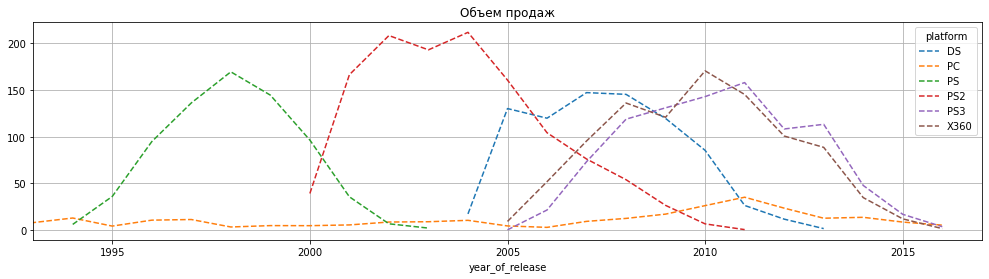

In [28]:
data_platform_year.plot(figsize=(17, 4), grid=True, style='--', xlim=(1993, 2017), title='Объем продаж');
    

In [29]:
data_platform_year.sum()

platform
DS       804.28
PC       258.86
PS       727.58
PS2    1,247.16
PS3      935.19
X360     966.61
dtype: float64

Средняя продолжительность жизни платформы (консоли) 8-10 лет, и к 2016 году ТОП-5 теряет свои позиции. Показатель количества игр для ПК практически стабилен на протяжении всего времени, с небольшим ростом в 2011 году. Стоит отметить, что PS, PS2, PS3 это разные модификации одной консоли, выход PS4 был анонсирован на 2013 год, но в нашe выборку она не попала.

Посмотрим PS отдельно: 

In [30]:
data_platform_ps = (games.query('platform in ["PS2", "PS3", "PS", "PS4"]')
                      .pivot_table(index='year_of_release', columns='platform', values='over_sales', aggfunc='sum'))   

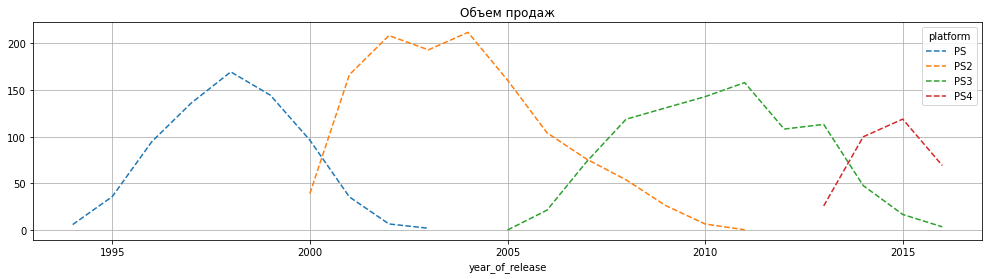

In [31]:
data_platform_ps.plot(figsize=(17, 4), grid=True, style='--', xlim=(1993, 2017), title='Объем продаж');

На графике хорошо заметно, что спад предыдущей версии консоли приходится как раз на выход новой версии. Так как выход новой консоли всегда анансируют заранее, то этот период ожидания тоже можно заметить на на графике. Зачем разрабатывать игру на старую консоль, если должна выйти новая, с более мощным "железом". Ожидаем, что на выборке с актуальными данными лидировать будет PS4. Спад в 2016 году возможно связан с тем, что данные за год не полные.

### Анализ актуального периода:

В качестве актуального периода для прогноза выберем данные за 2015-2016 год.

In [32]:
games_new = games[games['year_of_release'] > 2014]

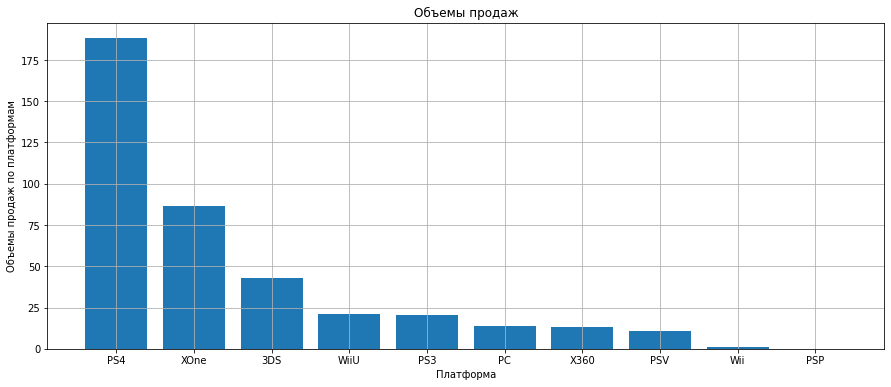

In [33]:
data_platform_new = (games_new.pivot_table(index='platform', values='over_sales', aggfunc='sum')
                 .sort_values(by='over_sales', ascending=False))
x = data_platform_new.index
y = data_platform_new['over_sales']
plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.grid()
plt.title("Объемы продаж")
plt.xlabel("Платформа")
plt.ylabel("Объемы продаж по платформам");

In [34]:
data_platform_new = (games_new.query('platform in ["PS4", "XOne", "3DS", "WiiU", "PS3", "PC"]')
                      .pivot_table(index='year_of_release', columns='platform', values='over_sales', aggfunc='sum'))
data_platform_new.sum()

platform
3DS     42.92
PC      13.77
PS3     20.42
PS4    188.15
WiiU    20.95
XOne    86.29
dtype: float64

Как и следовало ожидать, в связи с ограничением выборки по годам, ТОП-5 платформ существенно изменился. Сейчас лидируют PS4, XOne, 3DS, WiiU и PS3. На шестом месте ПК. Все таки, игры для ПК имеют свою постоянную нишу и восстребованы игроками. [XOne](https://ru.wikipedia.org/wiki/Xbox_One) это новая модель XB и [X360](https://ru.wikipedia.org/wiki/Xbox_360), она вышла на рунок в 2013 году, а в некоторых странах в 2014, соответственно сейчас набирает обороты. [WiiU](https://ru.wikipedia.org/wiki/Wii_U) и [3DS](https://ru.wikipedia.org/wiki/Nintendo_3DS) это портативные констоли, вышедшие на мировой рынок в 2012. А исходя из предыдущего анализа про 8-10 лет жизни, у них есть перспектива. А вот ставить ставки на PS3 я бы не стала. X360 перестали выпускать в апреле 2016 года, значит и новые игры для нее создавать уже перестали, но стоить отметить наличие совместимости игр на разных поколениях XB, в отличии от PS.

Определим ТОП самых актуальных платформ: `PS4`, `XOne`, `3DS`, `WiiU`, `PS3`, `PC`

> у нас 2016 год и мы не знаем, о том, что производство WiiU прекратится в конце 2017 года. Но игроки уже ее приобрели, значит играть планируют))

In [35]:
games_new_platform = games_new.query('platform in ["PS4", "XOne", "3DS", "WiiU", "PS3", "PC"]').reset_index(drop=True)

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

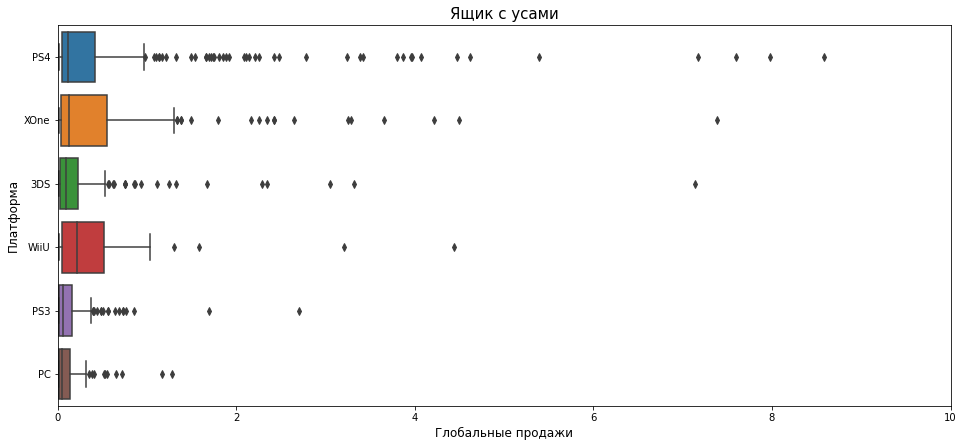

In [36]:
plt.figure(figsize=(16,7))
sns.boxplot(data=games_new_platform, x='over_sales', y='platform')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Глобальные продажи', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
plt.xlim(0, 10);

In [37]:
games_new_platform.groupby('platform')['over_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.00,0.33,0.80,0.01,0.03,0.09,0.23,7.14
PC,104.00,0.13,0.21,0.01,0.02,0.05,0.14,1.28
PS3,111.00,0.18,0.34,0.01,0.02,0.06,0.16,2.70
PS4,301.00,0.63,1.46,0.01,0.05,0.12,0.42,14.63
WiiU,42.00,0.50,0.85,0.01,0.05,0.21,0.52,4.44
XOne,167.00,0.52,0.97,0.01,0.04,0.13,0.56,7.39


Из данных видно:
- медиана расположилась у всех по разному, лидирует WiiU, но у 3DS больше максимальное количество проданных игр. Возможно повлияли какие то сверх популярные игры, вышедшие для 3DS.
- максимальные продажи при этом у PS4 и XOne как по суммам, так и по количеству игр. Это все же самые популярные консоли.
- PS3 свои позиции теряет, но из-за отсутствия обратной совместимости игр и давольно высокой цены на консоль PS4, игры выпускаются и продаются.
- PC держится стабильно, с минимальным стандартным отклонением 0.21, т.е. каждая игра пользуется спросом на всей изученной территории.

### Самая популярная платформа PS4

In [38]:
ps4 = games_new_platform.query('platform in "PS4"')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,over_sales
year_of_release,1.00,-0.16,-0.13,-0.08,-0.16,-0.02,0.02,-0.15
na_sales,-0.16,1.00,0.75,0.45,0.94,0.41,-0.03,0.92
eu_sales,-0.13,0.75,1.00,0.42,0.93,0.31,-0.09,0.95
jp_sales,-0.08,0.45,0.42,1.00,0.46,0.37,0.19,0.50
other_sales,-0.16,0.94,0.93,0.46,1.00,0.39,-0.07,1.00
critic_score,-0.02,0.41,0.31,0.37,0.39,1.00,0.53,0.39
user_score,0.02,-0.03,-0.09,0.19,-0.07,0.53,1.00,-0.06
over_sales,-0.15,0.92,0.95,0.50,1.00,0.39,-0.06,1.00


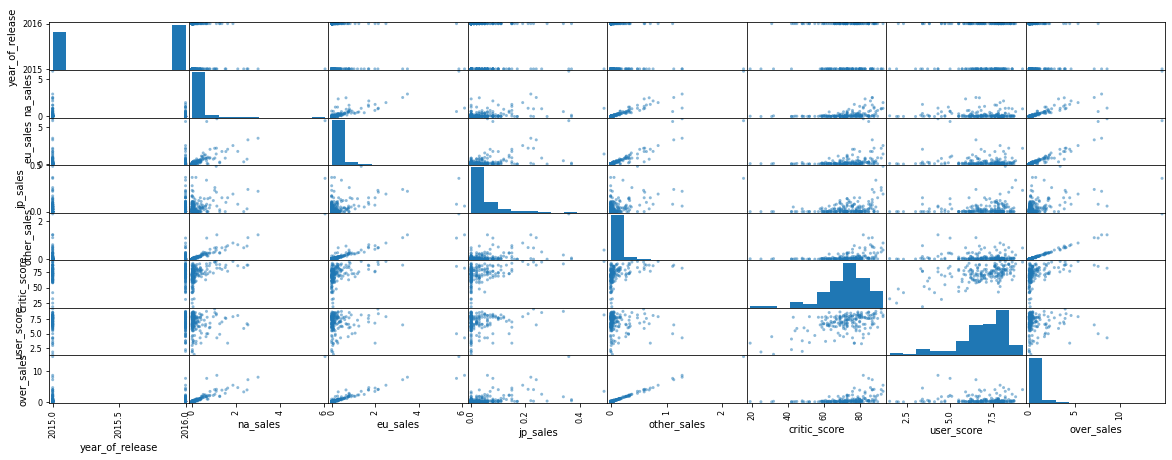

In [39]:
pd.plotting.scatter_matrix(ps4, figsize=(20, 7))
ps4.corr()

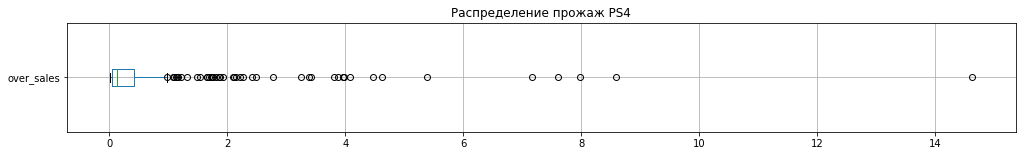

In [40]:
fig, ax = plt.subplots(figsize = (17,2))
ax = ps4[['over_sales']].boxplot(vert = False, ax =ax)
ax.set_title('Распределение прожаж PS4');

Из диаграммы рассеивания и данных корреляции какой либо зависимости продаж от отзывов не наблюдается. Возможно это саязано с отсутствием разделения на рейтинги, жанры и тем, что PS4 новая платформа и оценоки малое количество оценок на новые игры. Оценка критиков на общее количество продаж имеет корреляцию 0,39 что является незначительным и может не учитываться

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,over_sales
year_of_release,1.00,-0.12,-0.08,-0.07,-0.09,0.01,-0.00,-0.11
na_sales,-0.12,1.00,0.70,0.20,0.85,0.35,0.03,0.90
eu_sales,-0.08,0.70,1.00,0.15,0.92,0.26,-0.03,0.91
jp_sales,-0.07,0.20,0.15,1.00,0.14,0.11,0.16,0.35
other_sales,-0.09,0.85,0.92,0.14,1.00,0.30,-0.01,0.95
critic_score,0.01,0.35,0.26,0.11,0.30,1.00,0.48,0.33
user_score,-0.00,0.03,-0.03,0.16,-0.01,0.48,1.00,0.02
over_sales,-0.11,0.90,0.91,0.35,0.95,0.33,0.02,1.00


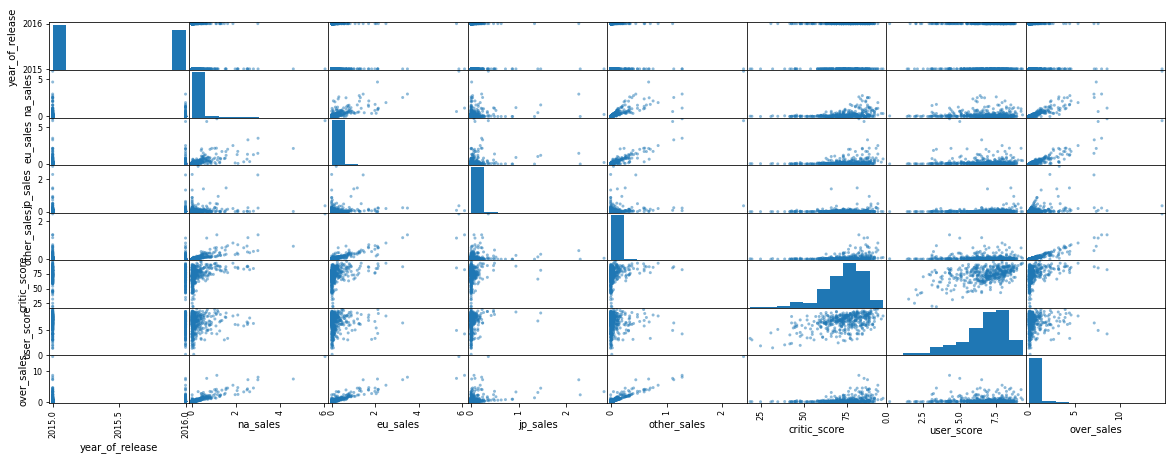

In [41]:
pd.plotting.scatter_matrix(games_new_platform, figsize=(20, 7))
games_new_platform.corr()

Аналогичная ситуация складывается и по остальным платформам. Не очень то и прислушиваются игроки ко мнению критиков, на каждую игру есть свой любитель и недовольный критик.

### Изучение игр по жанрам

In [42]:
genre = (games_new_platform.groupby('genre')
         .agg({'over_sales': 'median', 'user_score': 'median', 'critic_score': 'median'})
         .sort_values(by='over_sales', ascending=False)
         .reset_index())

In [43]:
genre_sum = (games_new_platform.groupby('genre')
         .agg({'over_sales': 'sum', 'user_score': 'median', 'critic_score': 'median'})
         .sort_values(by='over_sales', ascending=False)
         .reset_index())

In [44]:
display(genre)
display(genre_sum)

,genre,over_sales,user_score,critic_score
0,Shooter,0.41,6.85,77.00
1,Role-Playing,0.17,7.90,77.00
2,Platform,0.12,6.60,77.00
3,Sports,0.12,5.70,78.00
4,Simulation,0.10,6.90,71.00
5,Fighting,0.09,7.30,74.00
6,Action,0.08,7.05,73.00
7,Racing,0.06,7.05,71.00
8,Misc,0.06,6.65,76.50
9,Strategy,0.06,7.30,79.00


,genre,over_sales,user_score,critic_score
0,Shooter,103.35,6.85,77.00
1,Action,93.78,7.05,73.00
2,Sports,58.89,5.70,78.00
3,Role-Playing,52.73,7.90,77.00
4,Fighting,12.02,7.30,74.00
5,Misc,11.70,6.65,76.50
6,Racing,10.80,7.05,71.00
7,Adventure,9.47,7.90,72.00
8,Platform,9.05,6.60,77.00
9,Simulation,7.15,6.90,71.00


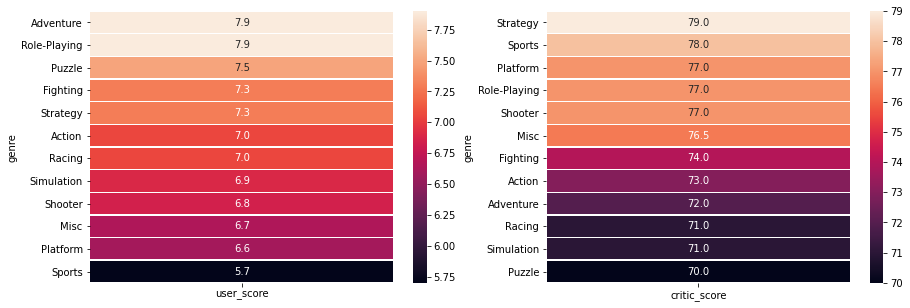

<Figure size 720x360 with 0 Axes>

In [45]:
user_ganre = (genre.pivot_table(index='genre', values='user_score', aggfunc='mean')
              .sort_values(by='user_score', ascending=False))
critic_ganre = (genre.pivot_table(index='genre', values='critic_score', aggfunc='mean')
                .sort_values(by='critic_score', ascending=False))
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(user_ganre, annot=True, fmt='.1f', linewidths=.5, ax=ax[0])
sns.heatmap(critic_ganre, annot=True, fmt='.1f', linewidths=.5, ax=ax[1]);

Вывод:
- Самый популярный жанр игры `Shooter` (общая сумма продаж - 103.35 млн.копий, медиана - 410 тыс.копий), при этом он имеет не самые высокие оценки игроков - 6.85 и критиков - 77
- на втором месте `Role-Playing` 52.79 млн. (медиана - 170 тыс.копий), игроки оценили игры на 7,9 баллов, критики - 77,0 баллов;
- Самые высокие оценки критиков (79 баллов) у жанра `Strategy`, но количество игр продано всего 2.85 млн.копий (медиана - 60 тыс.).
- А вот игроки больше всего баллов поставили играм `Adventure` - по 7.9, но продажи по ним скромные 9.47 млн. (медиана - 50 тыс.копий).
- Наименьшие оценки (5.7 баллов) у игр `Sports`, однако продажи сопоставимы играм `Role-Playing` - 58.89 млн.копий (медиана - 120 тыс.)

## Портрет пользователя по каждому региону

In [46]:
reqion_platform = (games_new_platform.groupby('platform')
                   .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
                   .reset_index())

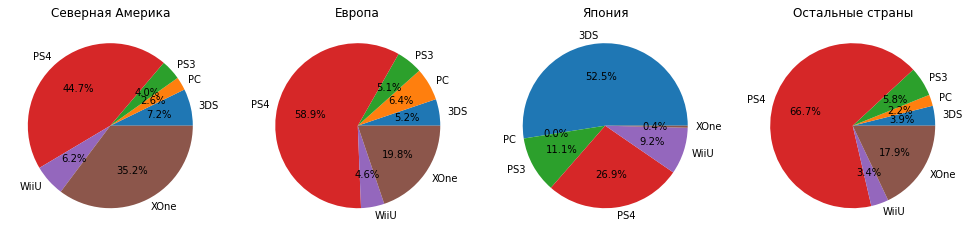

In [47]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(1, 4, figsize = (17,5))
ax_1.pie(reqion_platform['na_sales'], labels = reqion_platform['platform'], autopct='%1.1f%%')
ax_2.pie(reqion_platform['eu_sales'], labels = reqion_platform['platform'], autopct='%1.1f%%')
ax_3.pie(reqion_platform['jp_sales'], labels = reqion_platform['platform'], autopct='%1.1f%%')
ax_4.pie(reqion_platform['other_sales'], labels = reqion_platform['platform'], autopct='%1.1f%%')
ax_1.set_title('Северная Америка')
ax_2.set_title('Европа')
ax_3.set_title('Япония')
ax_4.set_title('Остальные страны');

In [48]:
reqion_platform

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,10.31,7.39,23.55,1.67
1,PC,3.72,9.10,0.00,0.95
2,PS3,5.66,7.30,4.97,2.49
3,PS4,63.86,83.54,12.05,28.70
4,WiiU,8.86,6.49,4.12,1.48
5,XOne,50.30,28.10,0.18,7.71


In [49]:
reqion_platform.sum()

platform       3DSPCPS3PS4WiiUXOne
na_sales                    142.71
eu_sales                    141.92
jp_sales                     44.87
other_sales                  43.00
dtype: object

1. График нам наглядно демонстрирует:
    - PS4 лидируют практически во всем мире кроме Японии. Северная Америка - 44,7% игр в стране приобретено для данной консоли, Европа - 58,9%, остальные страны - 66,7%. 
    - на втором месте по количеству игр это XOne. Северная Америка - 35,2% игр в стране приобретено для данной консоли, Европа - 19,8%, остальные страны - 17,9%.
    - Японии предпочитают 3DS, более 52% проданных игр. На стором месте PS4 - 26,9%, XOne практически не популярен - 0,4%, на ПК там не играют.
    - Стоит вспомнить, что WiiU по общему количеству продаж находился на 4 месте, но в Северной Америки игры для нее приобрели только 6,2% игроков, в Европе 4,6%, в остальном мире - 34%. Наибольший процент приходится на Японию - 9,2% жителей играют на этой консоли.
2. В абсолютном же значении можно отметить, что рынок Северной Америки сопоставим с рынком Европы (по 38% проданных копий на каждый регион), на Японию, как и на остальной мир приходится по 11% от всех мировых продаж.
    - Из чего следует, что PS4 действительно является мировым лидером
    - 50% всех игр для 3DS продаются в Японии. Это в большенстве своем сказано с тем, что 3DS портитивная консоль, а жители Японии отличаются своей работоспособностью, играют по пути на работу, и экономией жилого пространства.

> Япония, это Япония. Самая загадочная страна в мире

In [50]:
reqion_genre = (games_new_platform.groupby('genre')
                   .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
                   .reset_index())

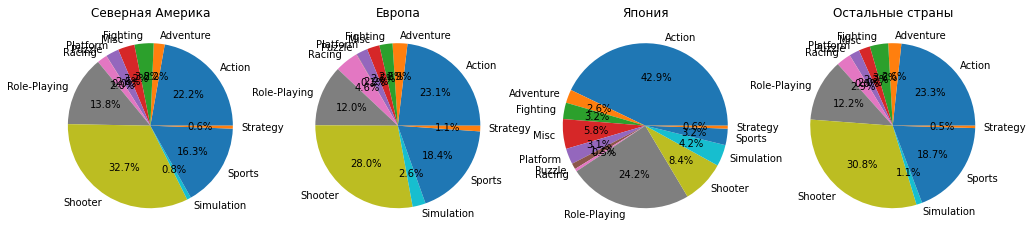

In [51]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(1, 4, figsize = (17,10))
ax_1.pie(reqion_genre['na_sales'], labels = reqion_genre['genre'], autopct='%1.1f%%')
ax_2.pie(reqion_genre['eu_sales'], labels = reqion_genre['genre'], autopct='%1.1f%%')
ax_3.pie(reqion_genre['jp_sales'], labels = reqion_genre['genre'], autopct='%1.1f%%')
ax_4.pie(reqion_genre['other_sales'], labels = reqion_genre['genre'], autopct='%1.1f%%')
ax_1.set_title('Северная Америка')
ax_2.set_title('Европа')
ax_3.set_title('Япония')
ax_4.set_title('Остальные страны');

На основании данных графиков можно сделать следующие выводы:
* Можно отметить лидеров. Распределение по странам практически аналогичное:
    - В Северной Америки любят Shooter - 32,7%, Action - 22,2%, Sports - 16,3%, Role-Playing - 13,8%
    - В Европе предпочитают Shooter - 28,0%, Action - 23,1%, Sports - 18,4%, Role-Playing - 12,0%
    - В остальном мире жанры те же, Shooter - 30,8%, Action - 23,3%, Sports - 18,7%, Role-Playing - 12,2%
* Япония отличается от всех остальных стран
    - беспорный лидер Action - 42,9%
    - на втором месте Role-Playing - 24,2%
    - на всемирного любителя Shooter приходится всего 8,4% (возможно в него играют только имигранты)

In [52]:
reqion_rating = (games_new_platform.groupby('rating')
                   .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
                .reset_index())                

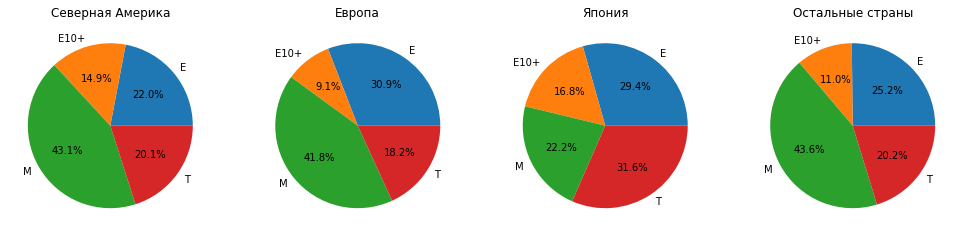

In [53]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(1, 4, figsize = (17,10))
ax_1.pie(reqion_rating['na_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_2.pie(reqion_rating['eu_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_3.pie(reqion_rating['jp_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_4.pie(reqion_rating['other_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_1.set_title('Северная Америка')
ax_2.set_title('Европа')
ax_3.set_title('Япония')
ax_4.set_title('Остальные страны');

[Рейтинги ESRB](https://www.esrb.org):
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «M» («Mature») — «От 17 лет»
- «T» («Teen») — «Подросткам 13—19 лет»

Из результатав анализа мы видем, что как и прежде распределение рейтинга игр в Северной америке, Европе и остальном мире практически одинаковы:
- Лидирует категория М (от 17 лет) 43,1/ 41,8/ 43,6 %% соответственно
- на вторе месте категория Е (для всех) и Т (для подростков 13-19 лет)
- на последнем месте E10+. Здесь есть небольшие отличия, так как в Северной Америке эту категорию покупают в 14,9% случаях, а в Европе и остальном мире 9 и 11%% соответственно.
- Япония отличается своими предпочтениями:
    - Игры для подростков здесь берут в 31,6% случаях, игры для всех - 29,4%, игры для взрослой категории - 22,2%, игры для детей от 10 лет - 16,8%. Возможно это связано с врожденной законопослушностью жителей Японии, и они строже соблюдают возрастные ограничения.

Для посчета игр без рейтинга необходимо заменить пропуски в столбце `rating` на `no_rating`.

In [54]:
games_new_platform['rating'] = games_new_platform['rating'].fillna('no_rating')

In [56]:
reqion_rating = (games_new_platform.groupby('rating')
                   .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
                .reset_index())                

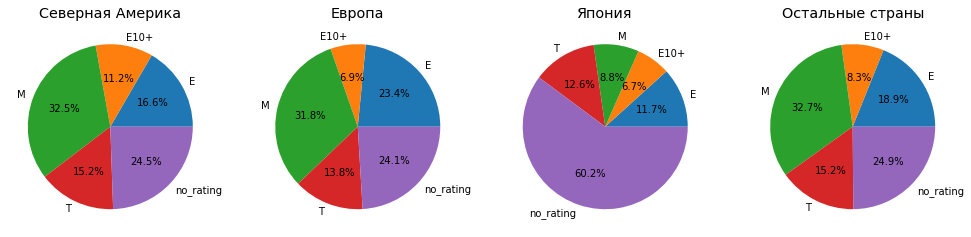

In [57]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(1, 4, figsize = (17,10))
plt.style.use('ggplot')
ax_1.pie(reqion_rating['na_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_2.pie(reqion_rating['eu_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_3.pie(reqion_rating['jp_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_4.pie(reqion_rating['other_sales'], labels = reqion_rating['rating'], autopct='%1.1f%%')
ax_1.set_title('Северная Америка')
ax_2.set_title('Европа')
ax_3.set_title('Япония')
ax_4.set_title('Остальные страны');

При учете в анализе игр без рейтинга ESRB картина существенно изменяется:
- Распределение игр без рейтинга:
    * в Северной Америке, Европе и остальных странах - 24,1-24,9% всех проданных игр в регионе.
    * в Японии более 60%
- категория М (от 17 лет):
    * в Северной Америке, Европе и остальных странах - 31,8-32,7%% всех проданных игр в регионе.
    * в Японии 8,8%
- категория Е
    * в Северной Америке, Европе и остальных странах - 16,6/ 23,4/ 18,9%% соответственно.
    * в Японии 11,7%
- категория Т:
    * в Северной Америке, Европе и остальных странах - 15,2/ 13,8/ 15,2%% соответственно.
    * в Японии 12,6%
- на последнем месте E10+:
    * в Северной Америке, Европе и остальных странах - 11,2/ 6,9/ 8,3%% соответственно.
    * в Японии 6,7%


Данное обстоятельство обстоятельство необходимо учесть при планировании

## Проверка гипотез

Гипотезы в работе:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Гипотеза № 1**
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `scipy.stats.ttest_ind (array1, array2, equal_var)`

Пороговое значение `alpha` установим 5%

In [57]:
ps4_user = games_new_platform[games_new_platform['platform'] == "PS4"]['user_score']
xone_user = games_new_platform[games_new_platform['platform'] == "XOne"]['user_score']

In [58]:
print('Дисперсия для ps4_user', np.var(ps4_user))
print('Дисперсия для xone_user', np.var(xone_user))

Дисперсия для ps4_user 2.141653462603878
Дисперсия для xone_user 2.1082234820025954


In [59]:
alpha = .05

results = st.ttest_ind(ps4_user.dropna(), xone_user.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06942429992690709
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не опровергнута, значит средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми.

**Гипотеза № 2**:

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [60]:
action_user = games_new_platform[games_new_platform['genre'] == "Action"]['user_score']
sports_user = games_new_platform[games_new_platform['genre'] == "Sports"]['user_score']

In [61]:
print('Дисперсия для action_user', np.var(action_user))
print('Дисперсия для sports_user', np.var(sports_user))

Дисперсия для action_user 1.9038261763038546
Дисперсия для sports_user 3.3937030035706783


In [62]:
alpha = .05

results = st.ttest_ind(action_user.dropna(), sports_user.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.449377661128501e-08
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтверждена, значит средние пользовательские рейтинги жанров Action и Sports могут различаться.

Вывод:
- Нулевая гипотеза не опровергнута, значит средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми.
- Нулевая гипотеза не подтверждена, значит средние пользовательские рейтинги жанров Action и Sports могут различаться.

## Вывод

1. Представленные данные:
-  Нам предоставлены данные интернет-магазина "Стримчик" о продаже игр до 2016года.
    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы долларов)
    - EU_sales — продажи в Европе (миллионы долларов)
    - JP_sales — продажи в Японии (миллионы долларов)
    - Other_sales — продажи в других странах (миллионы долларов)
    - Critic_Score — оценка критиков (от 0 до 100)
    - User_Score — оценка пользователей (от 0 до 10)
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).
- Количество игр: 11559
- Количество игровых платформ: 31
- Количество жанров: 12
- Количество лет: 37
- Количество явных дубликатов 0
- Количество строк 16715
- Количество столбцов 11

*Данные за 2016 год могут быть неполными.
    

2. В процессе предобработки данных удалили две строки, где были пропущены данные о наименовании и жанре игры, восстановили часть сведений о годе выпуска, сделали дополнительные расчеты об общем количестве продаж по каждой игре, изменили типы данных.

3. Изучили количество игр по каждому году:
    - в период с 1993 по 2009 год отмечается резкое увеличесние количества выпущенных компьютерных игр. Это можно объяснить развитием персональных компьютеров, внедрением операционных систем Microsoft Windows и Mac OS, а так же появлением приставок такие как Nintendo, Playstation, позже XBOX. В этот же период широко внедрялись CD-ROM, увеличилось число домашних персональных компьютеров. Рост мощности и доступности аппаратного обеспечения, так же сказался на популярности компьютерных игр.
    - в период с 2009 по 2015 гг. можно отметить спад. В этот период многие разработчики начали выпускать более серьезные объемные и кроссплатформенные проекты, поэтому качество времени на разработку одной игры существенно увеличилось.
4. Изучили как менялись продажи по платформам:
    - самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS. Объемы продаж более 600 млн. копий
    - Средняя продолжительность жизни платформы (консоли) 8-10 лет, и к 2016 году ТОП-5 теряет свои позиции. Показатель количества игр для ПК практически стабилен на протяжении всего времени, с небольшим ростом в 2011 году. Стоит отметить, что PS, PS2, PS3 это разные модификации одной консоли, выход PS4 был анонсирован на 2013 год, но в нашe выборку она не попала.
    - спад спроса на игры предыдущей версии консоли приходится как раз на выход новой версии. Так как выход новой консоли всегда анансируют заранее, то этот период ожидания тоже можно заметить на на графике. Зачем разрабатывать игру на старую консоль, если должна выйти новая, с более мощным "железом". Ожидаем, что на выборке с актуальными данными лидировать будет PS4. Спад в 2016 году возможно связан с тем, что данные за год не полные.
5. В качестве актуального периода для прогноза выбрали данные за 2015-2016 год:
    - в связи с ограничением выборки по годам, ТОП-5 платформ существенно изменился. Сейчас лидируют PS4, XOne, 3DS, WiiU и PS3. На шестом месте ПК. Все таки, игры для ПК имеют свою постоянную нишу и восстребованы игроками. XOne это новая модель XB и X360, она вышла на рунок в 2013 году, а в некоторых странах в 2014, соответственно сейчас набирает обороты. WiiU и 3DS это портативные констоли, вышедшие на мировой рынок в 2012. А исходя из предыдущего анализа про 8-10 лет жизни, у них есть перспектива. А вот ставить ставки на PS3 я бы не стала. X360 перестали выпускать в апреле 2016 года, значит и новые игры для нее создавать уже перестали, но стоить отметить наличие совместимости игр на разных поколениях XB, в отличии от PS.
6. Определим ТОП самых актуальных платформ: PS4, XOne, 3DS, WiiU, PS3, PC
    - медиана продаж расположилась у всех по разному, лидирует WiiU, но у 3DS больше максимальное количество проданных игр. Возможно повлияли какие то сверх популярные игры, вышедшие для 3DS.
    - максимальные продажи при этом у PS4 и XOne как по суммам, так и по количеству игр. Это все же самые популярные консоли.
    - PS3 свои позиции теряет, но из-за отсутствия обратной совместимости игр и давольно высокой цены на консоль PS4, игры выпускаются и продаются.
    - PC держится стабильно, с минимальным стандартным отклонением 0.21, т.е. каждая игра пользуется спросом на всей изученной территории.

7. Определили, что самая популярная консоль PS4, изучили ее показатели:
    - Из диаграммы рассеивания и данных корреляции какой либо зависимости продаж от отзывов не наблюдается. Возможно это саязано с отсутствием разделения на рейтинги, жанры и тем, что PS4 новая платформа и оценоки малое количество оценок на новые игры. Оценка критиков на общее количество продаж имеет корреляцию 0,39 что является незначительным и может не учитываться
    - Аналогичная ситуация складывается и по остальным платформам. Не очень то и прислушиваются игроки ко мнению критиков, на каждую игру есть свой любитель и недовольный критик.

8. Изучены показатели продаваемости игр по жанрам: 
    - Самый популярный жанр игры `Shooter` (общая сумма продаж - 103.35 млн.копий, медиана - 410 тыс.копий), при этом он имеет не самые высокие оценки игроков - 6.85 и критиков - 77
    - на втором месте `Role-Playing` 52.79 млн. (медиана - 170 тыс.копий), игроки оценили игры на 7,9 баллов, критики - 77,0 баллов;
    - Самые высокие оценки критиков (79 баллов) у жанра `Strategy`, но количество игр продано всего 2.85 млн.копий (медиана - 60 тыс.).
    - А вот игроки больше всего баллов поставили играм `Adventure` - по 7.9, но продажи по ним скромные 9.47 млн. (медиана - 50 тыс.копий).
    - Наименьшие оценки (5.7 баллов) у игр `Sports`, однако продажи сопоставимы играм `Role-Playing` - 58.89 млн.копий (медиана - 120 тыс.)

9. Составлен портрет пользователя по каждому региону:
* PS4 лидируют практически во всем мире кроме Японии. Северная Америка - 44,7% игр в стране приобретено для данной консоли, Европа - 58,9%, остальные страны - 66,7%. 
* на втором месте по количеству игр это XOne. Северная Америка - 35,2% игр в стране приобретено для данной консоли, Европа - 19,8%, остальные страны - 17,9%. Японии предпочитают 3DS, более 52% проданных игр. 
* На стором месте PS4 - 26,9%, XOne практически не популярен - 0,4%, на ПК там не играют. 
* Стоит вспомнить, что WiiU по общему количеству продаж находился на 4 месте, но в Северной Америки игры для нее приобрели только 6,2% игроков, в Европе 4,6%, в остальном мире - 34%. Наибольший процент приходится на Японию - 9,2% жителей играют на этой консоли. 
* В абсолютном же значении можно отметить, что рынок Северной Америки сопоставим с рынком Европы (по 38% проданных копий на каждый регион), на Японию, как и на остальной мир приходится по 11% от всех мировых продаж. Из чего следует, что PS4 действительно является мировым лидером 50% всех игр для 3DS продаются в Японии. Это в большенстве своем сказано с тем, что 3DS портитивная консоль, а жители Японии отличаются своей работоспособностью, играют по пути на работу, и экономией жилого пространства.

* Можно отметить лидеров по жанрам. Распределение по странам практически аналогичное:
    - В Северной Америки любят Shooter - 32,7%, Action - 22,2%, Sports - 16,3%, Role-Playing - 13,8%
    - В Европе предпочитают Shooter - 28,0%, Action - 23,1%, Sports - 18,4%, Role-Playing - 12,0%
    - В остальном мире жанры те же, Shooter - 30,8%, Action - 23,3%, Sports - 18,7%, Role-Playing - 12,2%
* Япония отличается от всех остальных стран
    - беспорный лидер Action - 42,9%
    - на втором месте Role-Playing - 24,2%
    - на всемирного любителя Shooter приходится всего 8,4% (возможно в него играют только имигранты)

* Распределение проданных игр по категориям:
    - Лидирует категория М (от 17 лет) 43,1/ 41,8/ 43,6 %% соответственно на вторе месте категория Е (для всех) и Т (для подростков 13-19 лет) 
    - на последнем месте E10+. Здесь есть небольшие отличия, так как в Северной Америке эту категорию покупают в 14,9% случаях, а в Европе и остальном мире 9 и 11%% соответственно. 
    - Япония отличается своими предпочтениями: Игры для подростков здесь берут в 31,6% случаях, игры для всех - 29,4%, игры для взрослой категории - 22,2%, игры для детей от 10 лет - 16,8%. Возможно это связано с врожденной законопослушностью жителей Японии, и они строже соблюдают возрастные ограничения.

При учете в анализе игр без рейтинга ESRB картина существенно изменяется:
- Распределение игр без рейтинга:
    * в Северной Америке, Европе и остальных странах - 24,1-24,9% всех проданных игр в регионе.
    * в Японии более 60%
- категория М (от 17 лет):
    * в Северной Америке, Европе и остальных странах - 31,8-32,7%% всех проданных игр в регионе.
    * в Японии 8,8%
- категория Е
    * в Северной Америке, Европе и остальных странах - 16,6/ 23,4/ 18,9%% соответственно.
    * в Японии 11,7%
- категория Т:
    * в Северной Америке, Европе и остальных странах - 15,2/ 13,8/ 15,2%% соответственно.
    * в Японии 12,6%
- на последнем месте E10+:
    * в Северной Америке, Европе и остальных странах - 11,2/ 6,9/ 8,3%% соответственно.
    * в Японии 6,7%

10. Изучены гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
    - Нулевая гипотеза не опровергнута, значит средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. 
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
    - Нулевая гипотеза не подтверждена, значит средние пользовательские рейтинги жанров Action и Sports могут различаться.

11. Прогнозы по продажам:
- Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются. 
- Так же необходимо следить за анонсами выпускаемых консолей, их популярностью и распространенностью по регионам. Не стоит принебрегать играми для консолей, предыдущего поколения, если у них нет обратной совместимости.
- Необходимо учитывать, для какого региона мы планируем продажи, так как вкусовые предпочтения как в играх, так и консолях давольно различны
- Не стоит опираться на оценки игроков и критиков, на каждую ишру есть свое комьюнити и злобные критики
    - В 2017 году большую часть прибыли будут приносить игры жанра Shooter и Role-Playing, для платформы PS4 и с рейтингом от 17 и выше.
    - На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех".
    - И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.
    - 30% всех проданных игр занимает ниша игр без рейтинга, в Японии же данный объем составляем более 60%